In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [15]:
param = {
        "number_features" : 7, 
}

In [16]:
def visualize_prediction(dataframe, line=False):
    fig, axes = plt.subplots(2, 4, figsize=(15,7.5), dpi=200)
    ax = axes.ravel()
    columns = dataframe.columns
    plt.subplots_adjust(hspace=0.2, wspace=0.4)
    for i in range(1,8):
        sns.lineplot(data=dataframe, x="timestamp", y=columns[i], ax=ax[i-1], label="target")
        sns.lineplot(data=dataframe, x="timestamp", y=columns[i+param["number_features"]], ax=ax[i-1], label="predicted")
        if line:
            ax[i-1].axvline(1536, 0,2, color="r", linestyle ="--", linewidth=3, label="train-validation")
        #plt.text(1570, 2, 'validation data', fontsize=12)
        #plt.text(1300, 2, 'training data', fontsize=12)
        ax[i-1].set(xlabel='time', ylabel='value')
        ax[i-1].set(title=columns[i])
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

In [17]:
def smooth_data(df, rate):
    for column in df.columns:
        smoothed_data = []
        for i,value in enumerate(df.loc[:,column]):
            if i==0:
                smoothed_data.append(value)
            else:
                x = rate  * value + (1 - rate) * smoothed_data[-1]
                smoothed_data.append(x)
        df.loc[:,column]=smoothed_data
    return df

# Visualisation of Prediction - Artifical Data with random walk
## Sensor Value Prediction

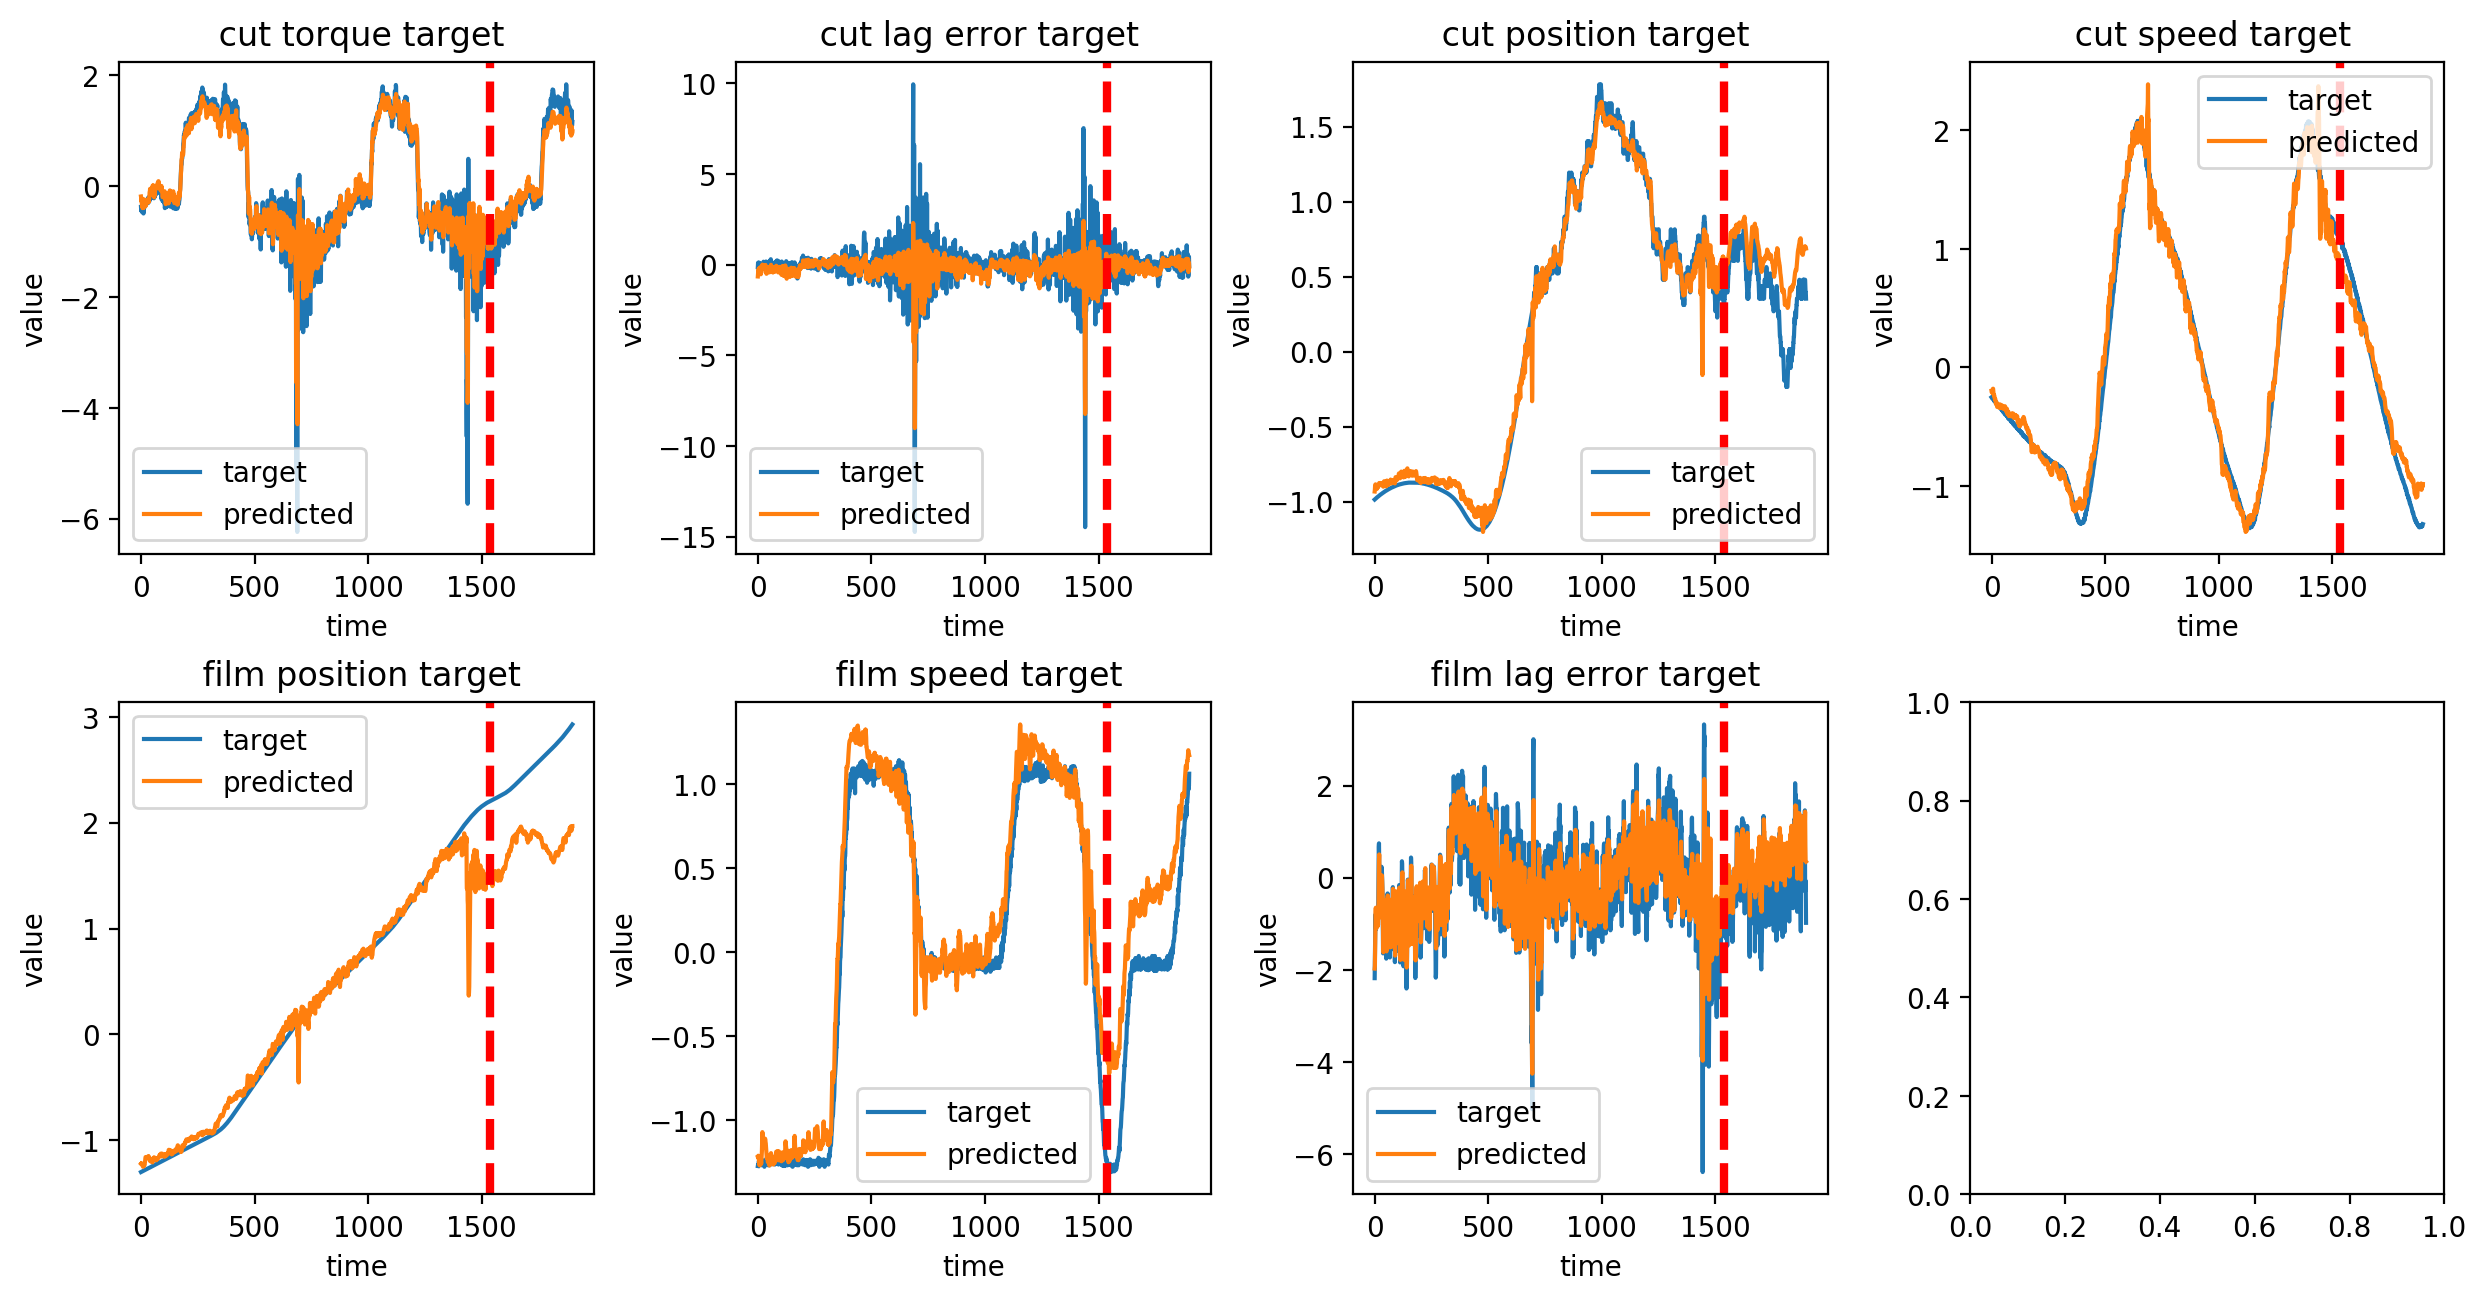

In [42]:
data_new_blade = pd.read_csv("../files/prediction/random_walk.csv", sep=";")
visualize_prediction(data_new_blade, line=True)

### Signal with random walk

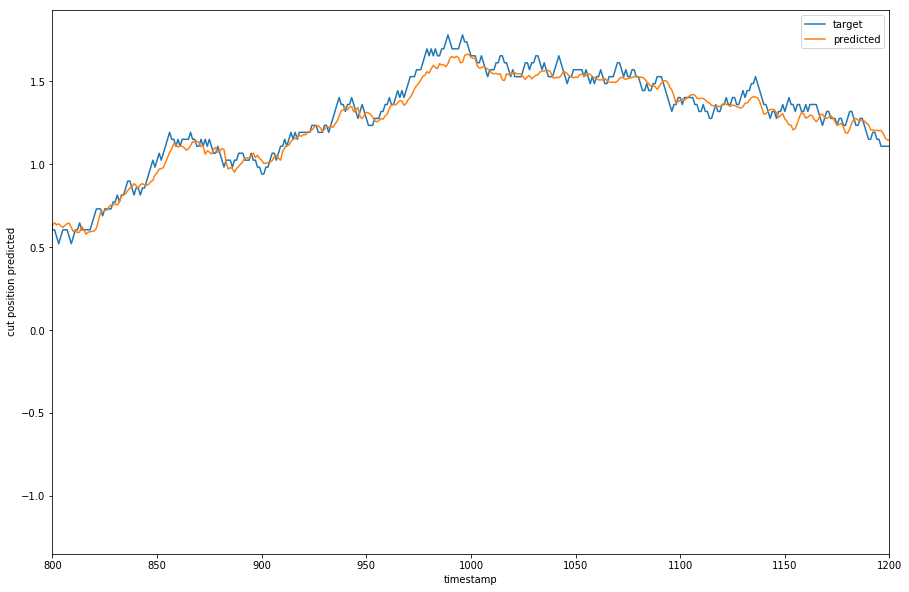

In [43]:
fig, axes = plt.subplots(1, 1, figsize=(15,10))
columns = data_new_blade.columns
a=sns.lineplot(data=data_new_blade, x="timestamp", y=columns[3], ax=axes, label="target")
b=sns.lineplot(data=data_new_blade, x="timestamp", y=columns[3+param["number_features"]], ax=axes, label="predicted")
axes.set_xlim(800,1200)
plt.show()

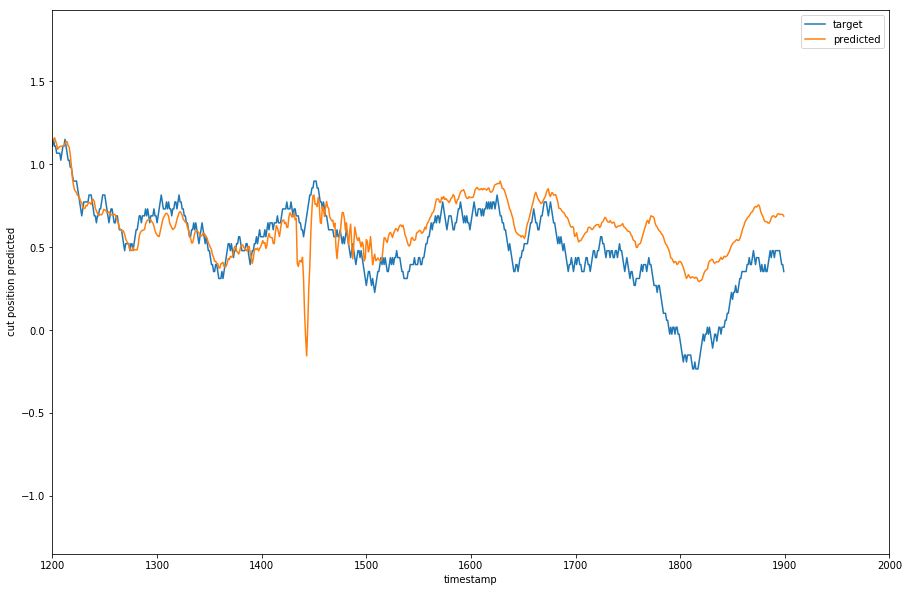

In [39]:
fig, axes = plt.subplots(1, 1, figsize=(15,10))
columns = data_new_blade.columns
a=sns.lineplot(data=data_new_blade, x="timestamp", y=columns[3], ax=axes, label="target")
b=sns.lineplot(data=data_new_blade, x="timestamp", y=columns[3+param["number_features"]], ax=axes, label="predicted")
axes.set_xlim(1200,2000)
plt.show()

## Sensor Value Prediction with First order difference 

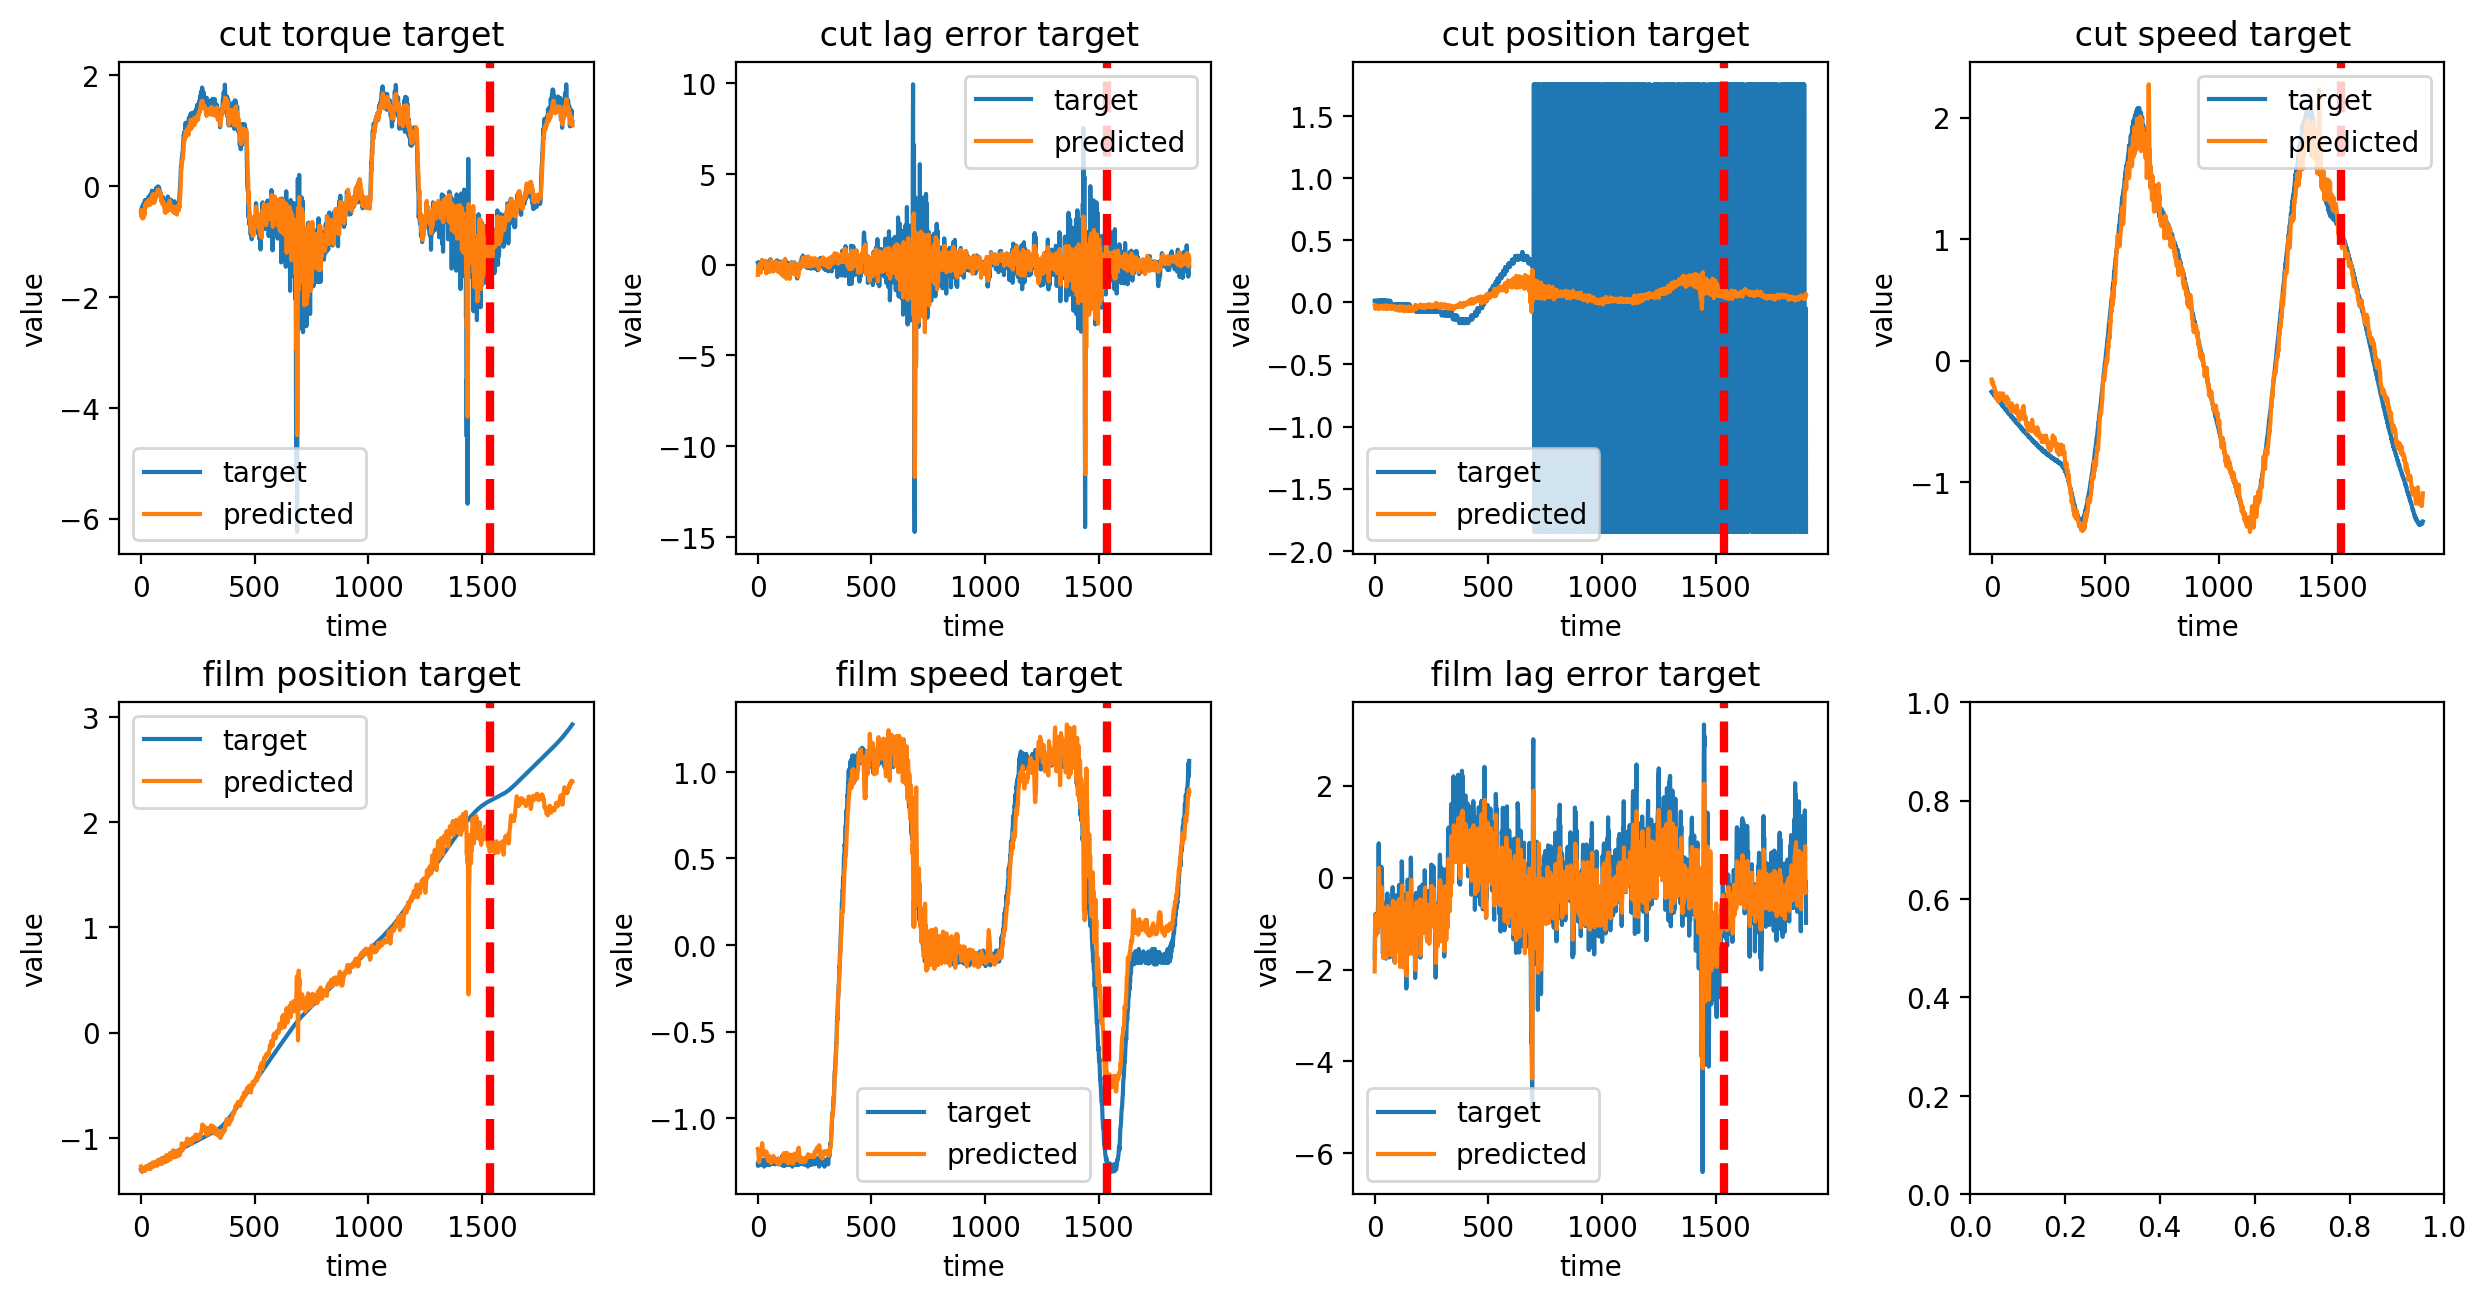

In [40]:
data_new_blade = pd.read_csv("../files/prediction/random_walk_difference.csv", sep=";")
visualize_prediction(data_new_blade, line=True)

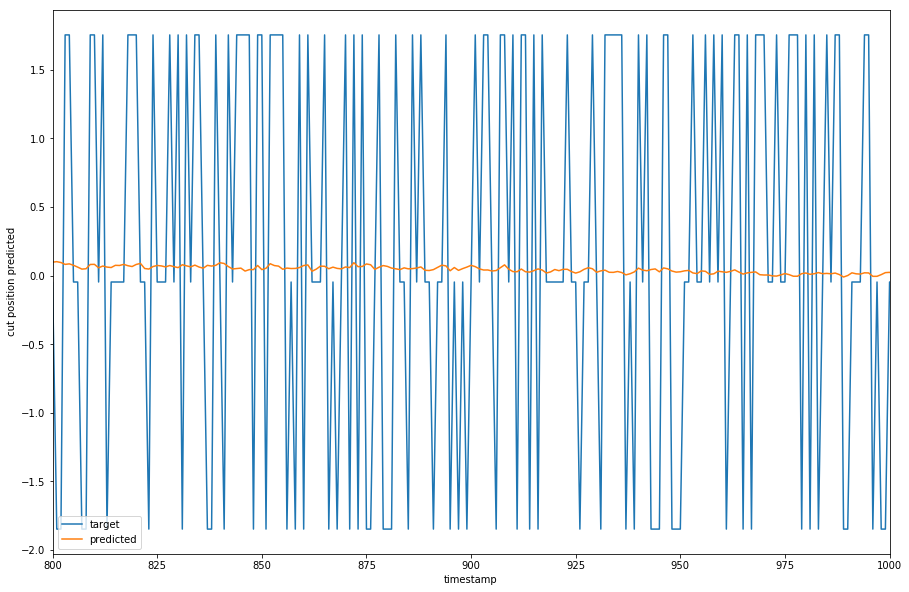

In [41]:
fig, axes = plt.subplots(1, 1, figsize=(15,10))
columns = data_new_blade.columns
a=sns.lineplot(data=data_new_blade, x="timestamp", y=columns[3], ax=axes, label="target")
b=sns.lineplot(data=data_new_blade, x="timestamp", y=columns[3+param["number_features"]], ax=axes, label="predicted")
axes.set_xlim(800,1000)
plt.show()